In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("salary_data_cleaned.csv")

In [25]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'empployer', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'rstudio_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [26]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [27]:
df['job_simplified'] = df['Job Title'].apply(title_simplifier)

In [28]:
df.job_simplified.value_counts()

data scientist    279
na                206
data engineer     119
analyst           102
mle                22
director           14
Name: job_simplified, dtype: int64

In [29]:
df['seniority'] = df['Job Title'].apply(seniority)

In [30]:
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [34]:
## Fix Los Angeles
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [36]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [37]:
# competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [44]:
# hourly wage to anual
df[df.hourly==1][['hourly','min_salary', 'max_salary']]

,hourly,min_salary,max_salary
165,1,17,24
177,1,21,34
197,1,18,25
202,1,21,34
210,1,15,25
246,1,17,24
271,1,21,34
337,1,18,25
345,1,24,39
357,1,21,34


In [45]:
df.hourly.value_counts()

0    718
1     24
Name: hourly, dtype: int64

In [47]:
df.company_txt = df.company_txt.apply(lambda x: x.replace('\n', '').replace('\r', ''))

In [52]:
df.drop('Unnamed: 0', axis=1, inplace=True)

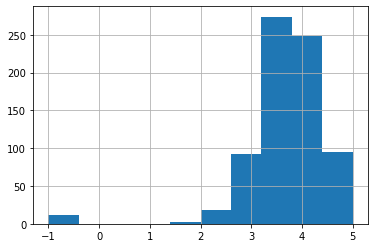

In [60]:
df.Rating.hist()

In [61]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'empployer', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'rstudio_yn', 'spark', 'aws', 'excel', 'job_simplified', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [67]:
def plot_hist(col):
    return col.hist()

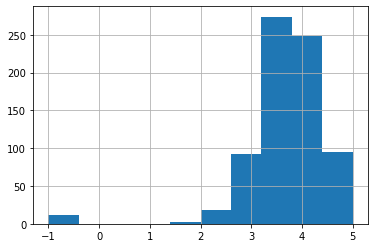

In [68]:
plot_hist(df['Rating'])

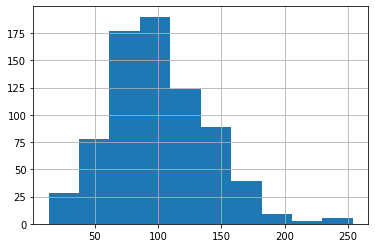

In [69]:
plot_hist(df['avg_salary'])

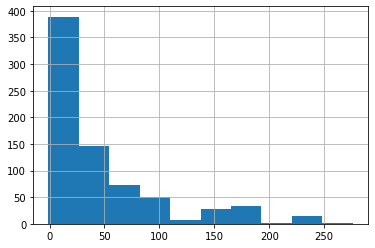

In [70]:
plot_hist(df['age'])

In [74]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'empployer', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'rstudio_yn', 'spark', 'aws', 'excel', 'job_simplified', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

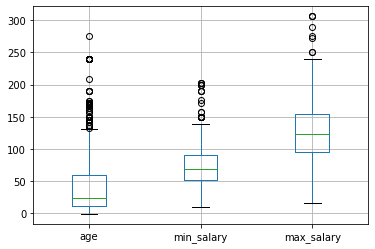

In [77]:
df.boxplot(['age', 'min_salary', 'max_salary'])

In [86]:
df_cat = df[['Location', 'Headquarters', 'Size',
               'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state',
                'spark', 'aws', 'excel', 'job_simplified', 'seniority']]

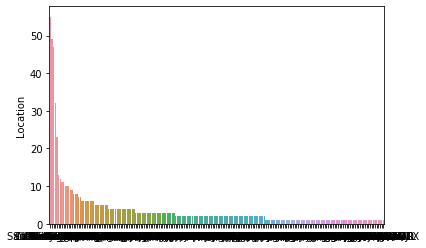

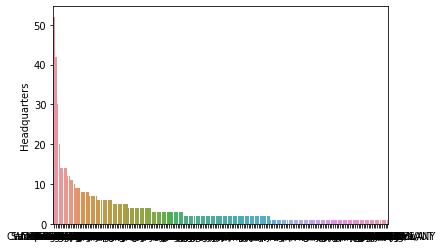

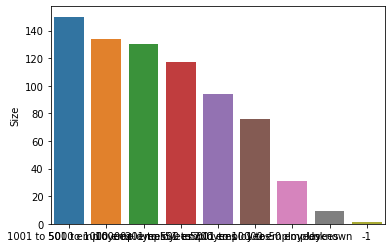

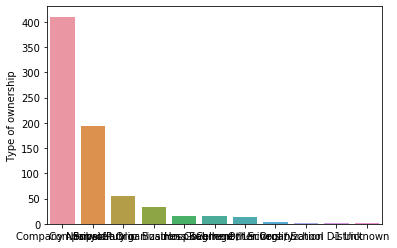

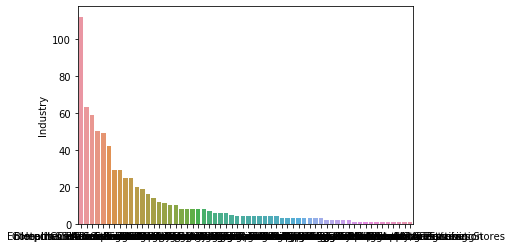

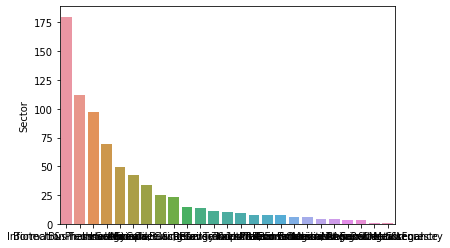

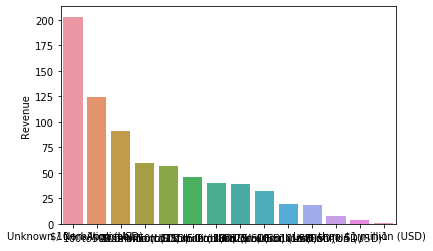

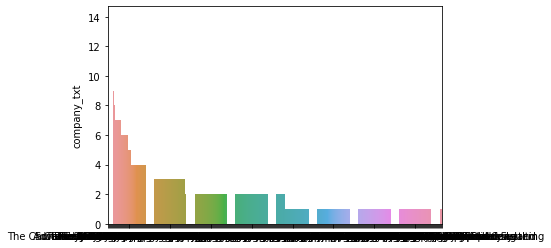

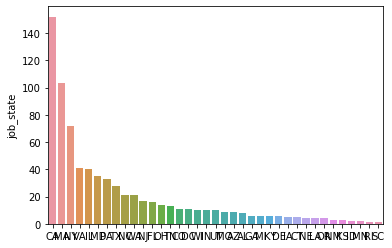

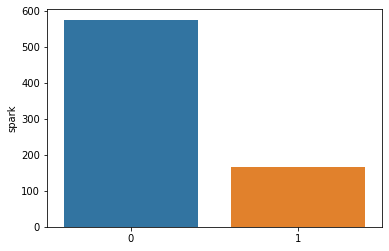

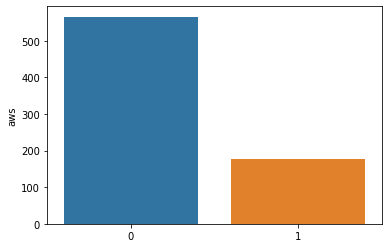

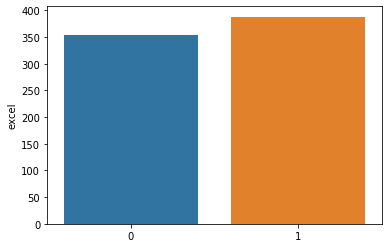

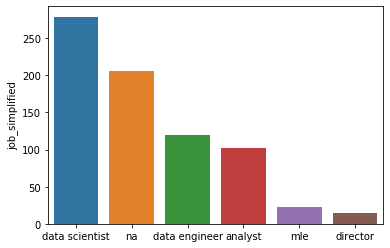

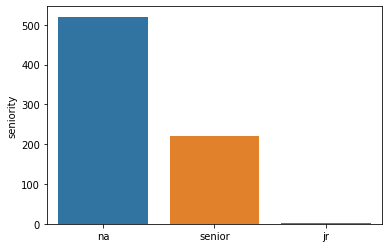

In [89]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.show()

graph for Location: total =20


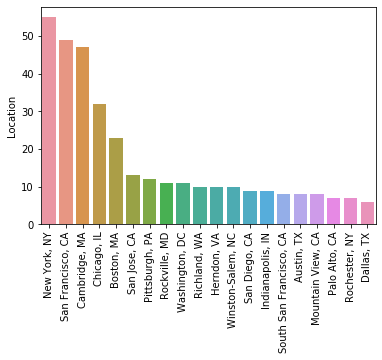

graph for Headquarters: total =20


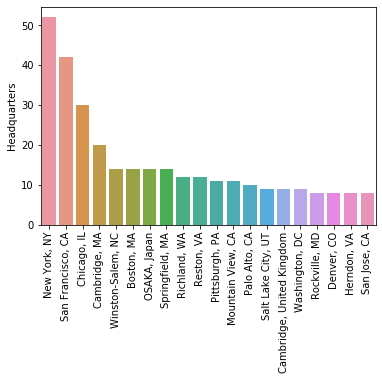

graph for company_txt: total =20


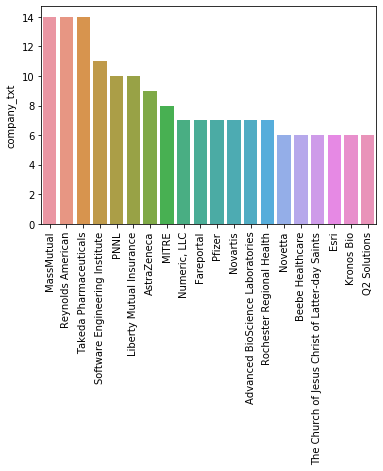

In [96]:
for i in df_cat[['Location', 'Headquarters', 'company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total =%d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [98]:
pd.pivot_table(df, index = 'job_simplified', values='avg_salary')

,avg_salary
job_simplified,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
mle,126.431818
na,84.764563


In [101]:
from wordcloud import Wordcloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

ImportError: cannot import name 'Wordcloud' from 'wordcloud' (C:\Users\hp\Anaconda3\lib\site-packages\wordcloud\__init__.py)

In [100]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


distutils: C:\Users\hp\Anaconda3\Include\UNKNOWN
sysconfig: C:\Users\hp\Anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: C:\Users\hp\Anaconda3\Include\UNKNOWN
sysconfig: C:\Users\hp\Anaconda3\Include
user = False
home = None
root = None
prefix = None
